# Data Manipulation with pandas

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transforming-Data" data-toc-modified-id="Transforming-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transforming Data</a></span><ul class="toc-item"><li><span><a href="#Introducing-DataFrames" data-toc-modified-id="Introducing-DataFrames-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introducing DataFrames</a></span></li><li><span><a href="#Sorting-and-subsetting" data-toc-modified-id="Sorting-and-subsetting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sorting and subsetting</a></span></li><li><span><a href="#New-columns" data-toc-modified-id="New-columns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>New columns</a></span></li></ul></li><li><span><a href="#Aggregating-Data" data-toc-modified-id="Aggregating-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aggregating Data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Counting" data-toc-modified-id="Counting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Counting</a></span></li><li><span><a href="#Grouped-summary-statistics" data-toc-modified-id="Grouped-summary-statistics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Grouped summary statistics</a></span></li><li><span><a href="#Pivot-tables" data-toc-modified-id="Pivot-tables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Pivot tables</a></span></li></ul></li><li><span><a href="#Slicing-and-indexing" data-toc-modified-id="Slicing-and-indexing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Slicing and indexing</a></span><ul class="toc-item"><li><span><a href="#Explicit-indexes" data-toc-modified-id="Explicit-indexes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Explicit indexes</a></span></li><li><span><a href="#Slicing-and-subsetting-with-.loc-and-.iloc" data-toc-modified-id="Slicing-and-subsetting-with-.loc-and-.iloc-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Slicing and subsetting with .loc and .iloc</a></span></li><li><span><a href="#Working-with-pivot-tables" data-toc-modified-id="Working-with-pivot-tables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Working with pivot tables</a></span></li></ul></li><li><span><a href="#Creating-and-Visualizing-DataFrames" data-toc-modified-id="Creating-and-Visualizing-DataFrames-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating and Visualizing DataFrames</a></span><ul class="toc-item"><li><span><a href="#Visualizing-your-data" data-toc-modified-id="Visualizing-your-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualizing your data</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Creating-DataFrames" data-toc-modified-id="Creating-DataFrames-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Creating DataFrames</a></span></li></ul></li></ul></div>

## Transforming Data

### Introducing DataFrames
- .head() returns the first few rows (the “head” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .describe() calculates a few summary statistics for each column.
- .values: A two-dimensional NumPy array of values.
- .columns: An index of columns: the column names.
- .index: An index for the rows: either row numbers or row names.

### Sorting and subsetting
- df.sort_values('col_name'), 排序該行
    - ascending=False
        - descending
    - df.sort_values(['col_name1', 'col_name2'])
        - 排序多行
    - df.sort_values(['col_name1', 'col_name2'], ascending=[False, True])
- df[['col_name1', 'col_name2']], subetting multiple columns
- df[df['col_name'] > 50], subetting rows
    - df[df['date'] > '2015-01-01']
        - 日期（固定格式）
    - df[ (df['col_name1'] == 1) & (df['col_name2'] == 2)]
    - l = ['one', 'two']
        df.col_name.isin(l)

In [3]:
import pandas as pd
homelessness = pd.read_pickle('homeless_data.pkl')

In [9]:
# Sorting
homelessness_ind = homelessness.sort_values('individuals')
homelessness_fam = homelessness.sort_values('family_members', ascending=False)
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])

homelessness_ind.head(2)
homelessness_fam.head(2)
homelessness_reg_fam.head(2)

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588


In [10]:
# Subsetting columns
individuals = homelessness.individuals
state_fam = homelessness[['state', 'family_members']]

# Subsetting rows
ind_gt_10k = homelessness[homelessness.individuals > 10000]
mountain_reg = homelessness[homelessness.region =='Mountain']
fam_lt_1k_pac = homelessness[(homelessness.family_members<1000) & (homelessness.region=='Pacific')]

# Subsetting rows by categorical variables
ar = ['South Atlantic', 'Mid-Atlantic']
south_mid_atlantic = homelessness[homelessness['region'].isin(ar)]

canu = ["California", "Arizona", "Nevada", "Utah"]
mojave_homelessness = homelessness[homelessness.state.isin(canu)]

### New columns

In [14]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness.individuals + homelessness.family_members

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness.individuals / homelessness.total

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [15]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness.individuals / homelessness.state_pop

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness.indiv_per_10k>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# See the result
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


## Aggregating Data

### Summary statistics
- df.col_name.
    - .mean()
    - .median()
    - .mode()
    - .min()
    - .max()
    - .var()
    - .std()
    - .sum()
    - .quantile()
    - .agg()
        - 裡面放 吃 column 的 function
        - 可使用多 column
            - df[[col1, col2]].agg(np.mean)
        - 可使用多 function
            - df[col].agg([np.mean, np.median])
    - 累加
        - .cumsum()
        - .cummax()
        - .cummin()
        - .cumprod()
            - 百分比
    

In [17]:
import pandas as pd
sales = pd.read_pickle('walmart_sales.pkl')

In [20]:
# Print the mean of weekly_sales
print(sales.weekly_sales.mean())

# Print the median of weekly_sales
print(sales.weekly_sales.median())

# Print the maximum of the date column
print(sales.date.max())

# Print the minimum of the date column
print(sales.date.min())

16094.726811185154
7682.47
2012-10-26 00:00:00
2010-02-05 00:00:00


In [24]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[\
            ["temperature_c", "fuel_price_usd_per_l", "unemployment"]\
           ].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr             15.30              0.211866         1.672
median          16.75              0.911922         7.852


In [26]:
department = 1
store = 1
sales_1_1 = sales[(sales.department == department) & (sales.store ==store)]

In [27]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1.weekly_sales.cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1.weekly_sales.cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

            date  weekly_sales  cum_weekly_sales  cum_max_sales
0     2010-02-05      24924.50          24924.50       24924.50
73    2010-02-12      46039.49          70963.99       46039.49
145   2010-02-19      41595.55         112559.54       46039.49
218   2010-02-26      19403.54         131963.08       46039.49
290   2010-03-05      21827.90         153790.98       46039.49
...          ...           ...               ...            ...
9883  2012-09-28      18947.81        3123160.62       57592.12
9956  2012-10-05      21904.47        3145065.09       57592.12
10028 2012-10-12      22764.01        3167829.10       57592.12
10101 2012-10-19      24185.27        3192014.37       57592.12
10172 2012-10-26      27390.81        3219405.18       57592.12

[143 rows x 4 columns]


### Counting
- df.drop_duplicates(subset='col_name'), 去掉重複資料
    - df.drop_duplicates(subset=['col_name1', 'col_name2'])
        - 滿足雙條件去掉
- df.col_name.value.counts()
    - sort=True
    - normalize=True

In [29]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(['store','type'])
print(store_types.head(2))

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(['store','department'])
print(store_depts.head(2))

# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates.date)

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
73     2010-02-12
2218   2010-09-10
3014   2010-11-26
3372   2010-12-31
3800   2011-02-11
5940   2011-09-09
6731   2011-11-25
7096   2011-12-30
7527   2012-02-10
9667   2012-09-07
Name: date, dtype: datetime64[ns]


In [33]:
stores = store_types
departments = store_depts
# Count the number of stores of each type
store_counts = stores['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = stores['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = departments.department.value_counts()
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = departments.department.value_counts(normalize=True)
print(dept_props_sorted)

A    22
B    17
C     6
Name: type, dtype: int64
A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64
1     45
9     45
4     45
6     45
8     45
      ..
37    20
50    14
43     5
39     5
65     1
Name: department, Length: 81, dtype: int64
1     0.013778
9     0.013778
4     0.013778
6     0.013778
8     0.013778
        ...   
37    0.006124
50    0.004287
43    0.001531
39    0.001531
65    0.000306
Name: department, Length: 81, dtype: float64


### Grouped summary statistics
- `df.groupby('group_col_name')['summary_col_name'].mean()`
- `df.groupby('group_col_name')['summary_col_name'].agg([mon, max, sum])`
- `df.groupby(['group_col_name1', 'group_col_name2']).mean()`

In [35]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()
print(sales_all)

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

6649037445.509999
[0.65137469 0.28763851 0.0609868 ]


In [36]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/sales_by_type.sum()
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(\
                             ["type", 'is_holiday'])\
                                ["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


In [38]:
# Import NumPy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales']\
                .agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
sales_stats

,amin,amax,mean,median
type,,,,
A,-4988.94,474330.10,20099.568043,10105.17
B,-3924.00,693099.36,12335.331875,6269.02
C,-379.00,112152.35,9519.532538,1149.67


In [44]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')\
                    ['unemployment','fuel_price_usd_per_l']\
                    .agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
unemp_fuel_stats

unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676

### Pivot tables
- df.pivot_table()
    - index='group_col_name1' or list
    - values='summary_col_name' or list
    - columns='group_col_name2' or list
    - aggfunc=functions or list

In [41]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(index='type',\
                                           values='weekly_sales',\
                                           aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,20099.568043,10105.17
B,12335.331875,6269.02
C,9519.532538,1149.67


In [45]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table\
                            (index=['type','is_holiday'],\
                                values='weekly_sales')

# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday

weekly_sales
type is_holiday              
A    False       20008.746759
     True        21297.517824
B    False       12248.741339
     True        13478.844240
C    False        9518.528116
     True         9532.963131

In [46]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(\
                                               index=['type'],\
                                               values='weekly_sales',\
                                               columns='is_holiday')

# Print mean_sales_by_type_holiday
mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,20008.746759,21297.517824
B,12248.741339,13478.844240
C,9518.528116,9532.963131


In [53]:
test = sales.pivot_table\
            (index=['type','department'],\
            values=['weekly_sales', 'temperature_c'],\
            columns='is_holiday',\
            aggfunc=[np.mean, np.max])
test

mean                                         \
                temperature_c             weekly_sales                 
is_holiday              False      True          False         True    
type department                                                        
A    1              16.567143  10.273308  22898.516986  23733.220864   
     2              16.567143  10.273308  52119.305991  50337.081000   
     3              16.567143  10.273308  13851.535150  14273.356364   
     4              16.567143  10.273308  32897.110010  33993.978136   
     5              16.504484  10.207798  25814.567522  39944.672248   
...                       ...        ...           ...           ...   
C    95             20.156147  14.065926  50776.389110  48848.402500   
     96             20.156147  14.065926  15617.133935  17746.282333   
     97             20.156147  14.065926  13453.006754  12974.472333   
     98             20.156147  14.065926   5392.247769   6643.644833   
     99             19.211944  31.333333      8.746500      0.020000   

                         amax                                     
                temperature_c            weekly_sales             
is_holiday              False      True         False      True   
type department                                                   
A    1              37.855556  35.677778    172225.55   78415.94  
     2              37.855556  35.677778    131234.40  105498.09  
     3              37.855556  35.677778    131564.25  114230.60  
     4              37.855556  35.677778     72048.55   72179.92  
     5              37.855556  35.677778    224823.65  208505.63  
...                       ...        ...          ...        ...  
C    95             37.344444  31.700000     94764.38   82693.13  
     96             37.344444  31.700000     35217.47   41237.26  
     97             37.344444  31.700000     24459.24   24246.77  
     98             37.344444  31.700000     15154.53   22329.99  
     99             30.972222  31.333333        50.00       0.02  

[227 rows x 8 columns]

In [55]:
# the mean weekly_sales by department and type
# fill missing values with 0s
# sum all rows and cols
sales.pivot_table\
(values="weekly_sales", index="department",
 columns="type", fill_value=0, margins=True)

type,A,B,C,All
department,,,,
1,22956.887886,17990.876158,8951.733462,19213.485088
2,51994.674873,43051.996919,14424.851713,43607.020113
3,13881.033137,12965.414311,820.276818,11793.698516
4,32973.814075,21259.895804,13669.370396,25974.630238
5,26803.448045,21184.602916,767.600774,21365.583515
...,...,...,...,...
96,19900.943552,4752.674874,15766.025431,15217.211505
97,22093.807101,3543.243304,13419.542809,14437.120839
98,10979.816195,299.951644,5479.758054,6973.013875


## Slicing and indexing

### Explicit indexes

In [58]:
import pandas as pd 
avoplotto = pd.read_pickle('avoplotto.pkl')
avoplotto.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [62]:
avoplotto_d = avoplotto.set_index('date')
avoplotto_d.head()

,type,year,avg_price,size,nb_sold
date,,,,,
2015-12-27,conventional,2015,0.95,small,9626901.09
2015-12-20,conventional,2015,0.98,small,8710021.76
2015-12-13,conventional,2015,0.93,small,9855053.66
2015-12-06,conventional,2015,0.89,small,9405464.36
2015-11-29,conventional,2015,0.99,small,8094803.56


In [63]:
avoplotto_d.reset_index().head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [64]:
avoplotto_d.reset_index(drop=True).head()

,type,year,avg_price,size,nb_sold
0,conventional,2015,0.95,small,9626901.09
1,conventional,2015,0.98,small,8710021.76
2,conventional,2015,0.93,small,9855053.66
3,conventional,2015,0.89,small,9405464.36
4,conventional,2015,0.99,small,8094803.56


In [65]:
# Subsetting with .loc[]
# Make a list
sizes = ['small', 'large']

# Subseting by square brackets
avoplotto[avoplotto['size'].isin(sizes)]



,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
671,2018-02-04,organic,2018,1.53,large,287724.61
672,2018-01-28,organic,2018,1.61,large,280080.34
673,2018-01-21,organic,2018,1.63,large,259172.13
674,2018-01-14,organic,2018,1.59,large,323669.83


In [66]:
# Subseting by .loc[]
avoplotto_s = avoplotto.set_index('size')
avoplotto_s.loc[sizes]

,date,type,year,avg_price,nb_sold
size,,,,,
small,2015-12-27,conventional,2015,0.95,9626901.09
small,2015-12-20,conventional,2015,0.98,8710021.76
small,2015-12-13,conventional,2015,0.93,9855053.66
small,2015-12-06,conventional,2015,0.89,9405464.36
small,2015-11-29,conventional,2015,0.99,8094803.56
...,...,...,...,...,...
large,2018-02-04,organic,2018,1.53,287724.61
large,2018-01-28,organic,2018,1.61,280080.34
large,2018-01-21,organic,2018,1.63,259172.13


In [67]:
# Setting multi-level indexes
avoplotto_d_s = avoplotto.set_index(['date', 'size'])

# List of tuples
rows_to_keep = [('2015-12-27', 'small'), ('2018-01-28', 'large')]

# Subset for rows to keep
print(avoplotto_d_s.loc[rows_to_keep])

                          type  year  avg_price      nb_sold
date       size                                             
2015-12-27 small  conventional  2015       0.95   9626901.09
           small       organic  2015       1.52     89709.92
2018-01-28 large  conventional  2018       1.09  12119884.61
           large       organic  2018       1.61    280080.34


### Slicing and subsetting with .loc and .iloc

In [72]:
# Sort the index 
avoplotto_sort = avoplotto_d_s.sort_index()

# Subset rows 
print(avoplotto_sort.loc['2015-12-27':'2018-02-04'])
# Try to subset inner index rows
print(avoplotto_sort.loc['small':'large'])
# Subset rows
print(avoplotto_sort.loc[('2015-12-27', 'small'):('2018-02-04','large')])

                                type  year  avg_price      nb_sold
date       size                                                   
2015-12-27 extra_large  conventional  2015       0.95   1184340.09
           extra_large       organic  2015       1.52      5836.04
           large        conventional  2015       0.95  10197890.05
           large             organic  2015       1.52    206198.62
           small        conventional  2015       0.95   9626901.09
...                              ...   ...        ...          ...
2018-02-04 extra_large       organic  2018       1.53      1703.52
           large        conventional  2018       0.87  20445501.03
           large             organic  2018       1.53    287724.61
           small        conventional  2018       0.87  21620180.90
           small             organic  2018       1.53    117922.52

[666 rows x 4 columns]
Empty DataFrame
Columns: [type, year, avg_price, nb_sold]
Index: []
                                type 

In [74]:
# Subset rows 
print(avoplotto_sort.loc[('2015-12-27', 'small'):('2018-02-04','large')])

# Subset columns 
print(avoplotto_sort.loc[:,'type':'avg_price'])

# Subset in both directions at once
print(avoplotto_sort.loc[('2015-12-27', 'small'):('2018-02-04','large'),\
                        'type':'avg_price'])

                                type  year  avg_price      nb_sold
date       size                                                   
2015-12-27 small        conventional  2015       0.95   9626901.09
           small             organic  2015       1.52     89709.92
2016-01-03 extra_large  conventional  2016       0.86   1560068.62
           extra_large       organic  2016       1.43      7749.40
           large        conventional  2016       0.86  16054083.86
...                              ...   ...        ...          ...
2018-01-28 small             organic  2018       1.61    118616.17
2018-02-04 extra_large  conventional  2018       0.87   1066830.22
           extra_large       organic  2018       1.53      1703.52
           large        conventional  2018       0.87  20445501.03
           large             organic  2018       1.53    287724.61

[660 rows x 4 columns]
                                type  year  avg_price
date       size                                    

### Working with pivot tables

In [117]:
avoplotto = pd.read_pickle('avoplotto.pkl')
avoplotto.pop('year')
avoplotto['date'] = pd.to_datetime(avoplotto['date'])
avoplotto.head(2), avoplotto['date'].dtype

(        date          type  avg_price   size     nb_sold
 0 2015-12-27  conventional       0.95  small  9626901.09
 1 2015-12-20  conventional       0.98  small  8710021.76, dtype('<M8[ns]'))

In [118]:
avoplotto['date']

0      2015-12-27
1      2015-12-20
2      2015-12-13
3      2015-12-06
4      2015-11-29
          ...    
1009   2018-02-04
1010   2018-01-28
1011   2018-01-21
1012   2018-01-14
1013   2018-01-07
Name: date, Length: 1014, dtype: datetime64[ns]

In [119]:
# Add a year column to temperatures
avoplotto['year'] = avoplotto['date'].dt.year
# Pivot avg_price by type and size vs year
avoplotto_y = temperatures.pivot_table(index=['type','size'],\
columns='year', values='avg_price')

# See the result
avoplotto_y

year                          2015      2016      2017      2018
type         size                                               
conventional extra_large  1.012500  1.046731  1.221698  1.060000
             large        1.012500  1.046731  1.221698  1.060000
             small        1.012500  1.046731  1.221698  1.060000
organic      extra_large  1.502308  1.480385  1.651509  1.554167
             large        1.502308  1.480385  1.651509  1.554167
             small        1.502308  1.480385  1.651509  1.554167

In [121]:
# Subset in both directions at once
avoplotto_y.loc[('conventional','large'):('organic','large'), '2015':'2016']

year                          2015      2016
type         size                           
conventional large        1.012500  1.046731
             small        1.012500  1.046731
organic      extra_large  1.502308  1.480385
             large        1.502308  1.480385

In [124]:
avoplotto_y.mean(axis='index'), avoplotto_y.mean(axis='columns')

(year
 2015    1.257404
 2016    1.263558
 2017    1.436604
 2018    1.307083
 dtype: float64, type          size       
 conventional  extra_large    1.085232
               large          1.085232
               small          1.085232
 organic       extra_large    1.547092
               large          1.547092
               small          1.547092
 dtype: float64)

## Creating and Visualizing DataFrames

### Visualizing your data

In [131]:
import matplotlib.pyplot as plt
import pandas as pd 

avoplotto = pd.read_pickle('avoplotto.pkl')
avoplotto.head()


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


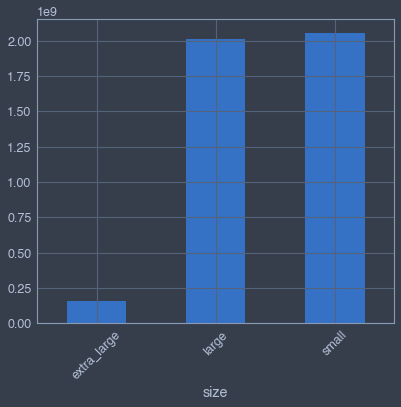

In [133]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avoplotto.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avoplotto.groupby('size').nb_sold.sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar', rot='45')

# Show the plot
plt.show()

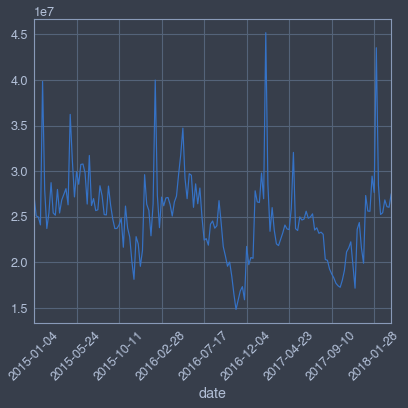

In [136]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avoplotto.groupby('date').nb_sold.sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line', rot='45')

# Show the plot
plt.show()

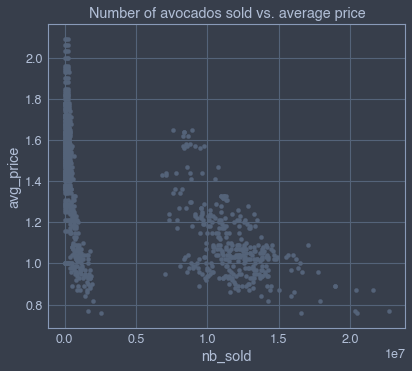

In [138]:
# Scatter plot of nb_sold vs avg_price with title
avoplotto.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

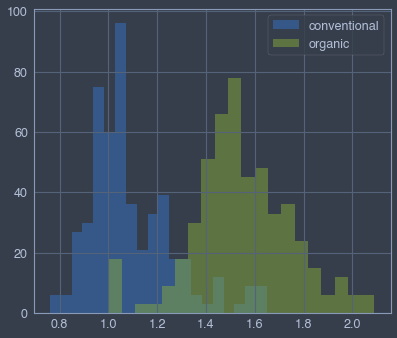

In [140]:
# Modify bins to 20
avoplotto[avoplotto["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avoplotto[avoplotto["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### Missing values
- `df.isna()`
    - T/F df
    - `df.isna().any()`
        - any NaN in columns
    - `df.isna().sum()`
        - number of NaN
- `df.dropna()`
- `df.fillna()`

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


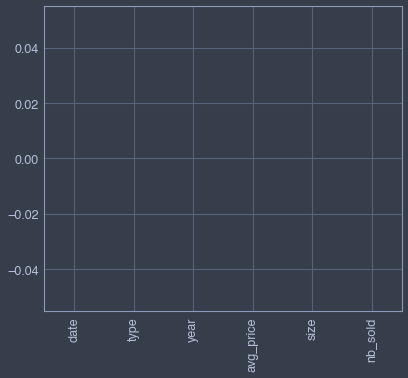

In [149]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avoplotto.isna())

# Check each column for missing values
print(avoplotto.isna().any())

# Bar plot of missing values by variable
avoplotto.isna().sum().plot(kind='bar')

# Show plot
plt.show()

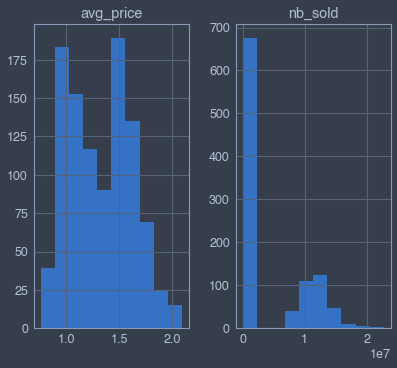

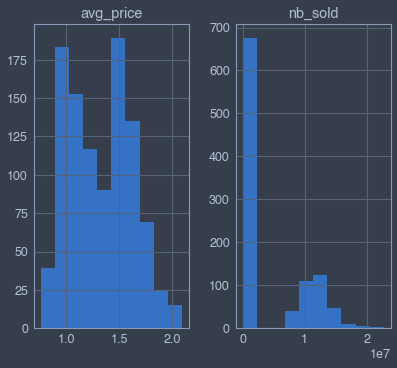

In [150]:
# From previous step
cols_with_missing = ["avg_price", "nb_sold"]
avoplotto[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avoplotto_filled = avoplotto.fillna(0)

# Create histograms of the filled columns
avoplotto_filled[cols_with_missing].hist()

# Show the plot
plt.show()

### Creating DataFrames

In [151]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
